In [2]:
import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" #for training on gpu

from scipy import signal
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
from random import shuffle
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv1D, MaxPooling1D, Dropout, GlobalAveragePooling1D, Reshape

#path to data files
path = "./nine_movs_six_sub_split/"

#path where you want to save trained model and some other files
sec_path = "./"

def create_dataset(file_path, persons):
    path = file_path + "{}_{}.txt"
    sgn = []
    lbl = []
    for i in persons:
        for j in range(9):
            with open(path.format(i, j + 1), "rb") as fp:  # Unpickling
                data = pickle.load(fp)

            for k in range(np.shape(data)[0]):
                sgn.append(data[k])
                lbl.append(j)

    sgn = np.asarray(sgn, dtype=np.float32)
    lbl = np.asarray(lbl, dtype=np.int32)

    c = list(zip(sgn, lbl))
    shuffle(c)
    sgn, lbl = zip(*c)

    sgn = np.asarray(sgn, dtype=np.float64)
    lbl = np.asarray(lbl, dtype=np.int64)

    print(sgn.shape)

    train_signals = sgn[0:int(0.8 * len(sgn))]
    train_labels = lbl[0:int(0.8 * len(lbl))]
    val_signals = sgn[int(0.8*len(sgn)):]
    val_labels = lbl[int(0.8*len(lbl)):]
    #test_signals = sgn[int(0.8*len(sgn)):]
    #test_labels = lbl[int(0.8*len(lbl)):]

    train_labels = to_categorical(train_labels)
    val_labels = to_categorical(val_labels)
    #test_labels = to_categorical(test_labels)

    return train_signals, train_labels, val_signals, val_labels

def create_dataset2(file_path, persons):
    path = file_path + "{}_{}.txt"
    sgn = []
    lbl = []
    i = persons
    for j in range(9):
        with open(path.format(i, j + 1), "rb") as fp:  # Unpickling
            data = pickle.load(fp)

        for k in range(np.shape(data)[0]):
             sgn.append(data[k])
             lbl.append(j)

    sgn = np.asarray(sgn, dtype=np.float32)
    lbl = np.asarray(lbl, dtype=np.int32)

    c = list(zip(sgn, lbl))
    shuffle(c)
    sgn, lbl = zip(*c)

    sgn = np.asarray(sgn, dtype=np.float64)
    lbl = np.asarray(lbl, dtype=np.int64)

    print(sgn.shape)

    train_signals = sgn[0:int(0.6 * len(sgn))]
    train_labels = lbl[0:int(0.6 * len(lbl))]
    val_signals = sgn[int(0.6*len(sgn)):int(0.8*len(sgn))]
    val_labels = lbl[int(0.6*len(lbl)):int(0.8*len(lbl))]
    test_signals = sgn[int(0.8*len(sgn)):]
    test_labels = lbl[int(0.8*len(lbl)):]

    train_labels = to_categorical(train_labels)
    val_labels = to_categorical(val_labels)
    test_labels = to_categorical(test_labels)

    return train_signals, train_labels, val_signals, val_labels, test_signals, test_labels



# training model on 5 form 6 persons
a = [1, 3, 4, 5, 6]
train_signals, train_labels, val_signals, val_labels = create_dataset(path, a)

num_classes = 9
num_sensors = 1
input_size = train_signals.shape[1]

model = Sequential()
model.add(Reshape((input_size, num_sensors), input_shape=(input_size, )))
model.add(Conv1D(50, 10, activation='relu', input_shape=(input_size, num_sensors)))
model.add(Conv1D(25, 10, activation='relu'))
model.add(MaxPooling1D(4))
model.add(Conv1D(100, 10, activation='relu'))
model.add(Conv1D(50, 10, activation='relu'))
model.add(MaxPooling1D(4))
model.add(Dropout(0.5))
#next layers will be retrained
model.add(Conv1D(100, 10, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

start_time = time.time()

history = model.fit(train_signals, train_labels,
                      steps_per_epoch=25,
                      epochs=100,
                      batch_size=None,
                      validation_data=(val_signals, val_labels),
                      #validation_steps=25
)

#elapsed_time = time.time() - start_time # training time

#loss, accuracy = model.evaluate(val_signals, val_labels) # evaluating model on test data

#loss = float("{0:.3f}".format(loss))
#accuracy = float("{0:.3f}".format(accuracy))
#elapsed_time = float("{0:.3f}".format(elapsed_time))

#saving some data
#f = open(sec_path + "info.txt", 'w')
#f.writelines(["loss: ", str(loss), '\n', "accuracy: ", str(accuracy), '\n', "elapsed_time: ", str(elapsed_time), '\n'])

#saving model
#model.save(sec_path + "pretrained_model.h5")

#saving test data just in case
#cc = list(zip(test_signals, test_labels))
#with open(sec_path + "pretrained_model_test_data.txt", "wb") as fp:
#   pickle.dump(cc, fp)

#saving history
#with open(sec_path + "pretrained_model_history.h5", "wb") as fp:
#    pickle.dump(history.history, fp)

train_signals, train_labels, val_signals, val_labels, test_signals, test_labels = create_dataset2(path, 2)

(2329, 400)
Epoch 1/100
25/25 [==============================] - 2s 89ms/step - loss: 2.1528 - accuracy: 0.1755 - val_loss: 1.8583 - val_accuracy: 0.2983
Epoch 2/100
25/25 [==============================] - 2s 78ms/step - loss: 1.7987 - accuracy: 0.2507 - val_loss: 1.6617 - val_accuracy: 0.3412
Epoch 3/100
25/25 [==============================] - 2s 76ms/step - loss: 1.6333 - accuracy: 0.3500 - val_loss: 1.4871 - val_accuracy: 0.4356
Epoch 4/100
25/25 [==============================] - 2s 77ms/step - loss: 1.4452 - accuracy: 0.4713 - val_loss: 1.2162 - val_accuracy: 0.5966
Epoch 5/100
25/25 [==============================] - 2s 74ms/step - loss: 1.1987 - accuracy: 0.5711 - val_loss: 1.0195 - val_accuracy: 0.6309
Epoch 6/100
25/25 [==============================] - 2s 74ms/step - loss: 1.0531 - accuracy: 0.6307 - val_loss: 0.9070 - val_accuracy: 0.6588
Epoch 7/100
25/25 [==============================] - 2s 69ms/step - loss: 0.9198 - accuracy: 0.6683 - val_loss: 0.9965 - val_accuracy: 0

25/25 [==============================] - 2s 82ms/step - loss: 0.0994 - accuracy: 0.9662 - val_loss: 0.3541 - val_accuracy: 0.9249
Epoch 59/100
25/25 [==============================] - 2s 81ms/step - loss: 0.1122 - accuracy: 0.9683 - val_loss: 0.4178 - val_accuracy: 0.9077
Epoch 60/100
25/25 [==============================] - 2s 82ms/step - loss: 0.1405 - accuracy: 0.9533 - val_loss: 0.3339 - val_accuracy: 0.9206
Epoch 61/100
25/25 [==============================] - 2s 82ms/step - loss: 0.1150 - accuracy: 0.9640 - val_loss: 0.4203 - val_accuracy: 0.8970
Epoch 62/100
25/25 [==============================] - 2s 79ms/step - loss: 0.0735 - accuracy: 0.9785 - val_loss: 0.3463 - val_accuracy: 0.9227
Epoch 63/100
25/25 [==============================] - 2s 82ms/step - loss: 0.0786 - accuracy: 0.9726 - val_loss: 0.3682 - val_accuracy: 0.9206
Epoch 64/100
25/25 [==============================] - 2s 78ms/step - loss: 0.0655 - accuracy: 0.9775 - val_loss: 0.3586 - val_accuracy: 0.9270
Epoch 65/100

[0.29828324913978577, 0.3412017226219177, 0.43562230467796326, 0.5965664982795715, 0.6309012770652771, 0.6587982773780823, 0.6351931095123291, 0.7145922780036926, 0.7875536680221558, 0.7982832789421082, 0.7553648352622986, 0.7939913868904114, 0.8068669438362122, 0.8454935550689697, 0.8626609444618225, 0.8733905553817749, 0.8454935550689697, 0.8669527769088745, 0.8433476686477661, 0.8454935550689697, 0.8927038908004761, 0.9012875556945801, 0.8776823878288269, 0.8669527769088745, 0.8776823878288269, 0.8841201663017273, 0.8862661123275757, 0.8776823878288269, 0.8626609444618225, 0.9098712205886841, 0.8776823878288269, 0.9120171666145325, 0.8969957232475281, 0.8969957232475281, 0.9163089990615845, 0.9163089990615845, 0.9098712205886841, 0.9055793881416321, 0.9141631126403809, 0.9098712205886841, 0.8991416096687317, 0.8991416096687317, 0.9055793881416321, 0.9012875556945801, 0.9077253341674805, 0.9055793881416321, 0.9206008315086365, 0.9206008315086365, 0.9120171666145325, 0.907725334167480

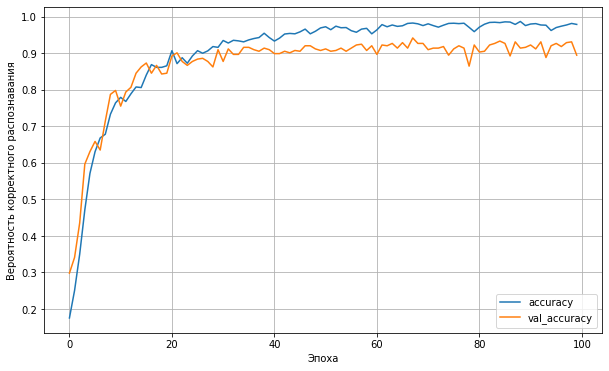

In [3]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Эпоха')
plt.ylabel('Вероятность корректного распознавания')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.grid(True)
print(history.history['val_accuracy'])

10/10 [==============================] - 0s 3ms/step - loss: 5.4145 - accuracy: 0.3367


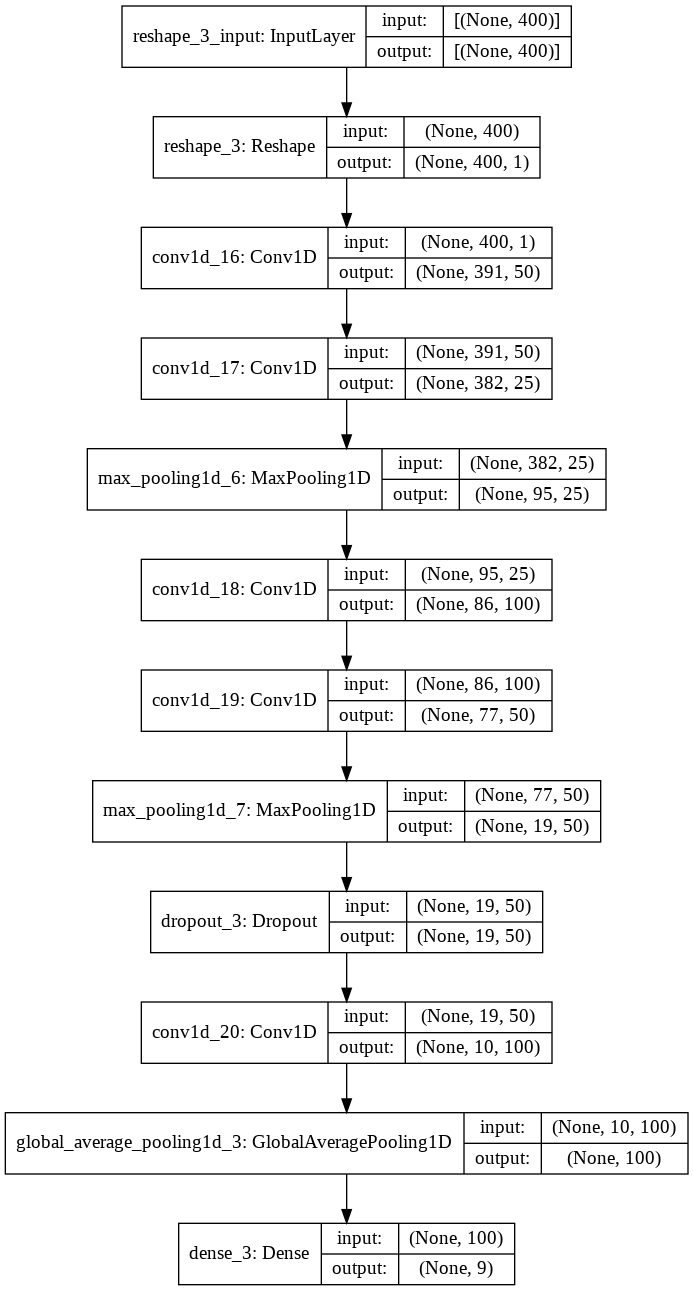

In [ ]:
model.evaluate(train_signals, train_labels)

keras.utils.plot_model(model, 'dense_image_classifier.png', show_shapes=True)

(11, 1, 1)
10/10 [==============================] - 0s 4ms/step - loss: 5.5373 - accuracy: 0.3198
2021-01-21 18:53:18.832133: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/fnYlALFXTMyxx7445DvgBA/

[2021-01-21T18:53:20] Started scanning logdir.
[2021-01-21T18:53:20] Done scanning logdir.
TensorBoard was run in `one_shot` mode, but did not find any uploadable data in the specified logdir: ./
An empty experiment was created. To delete the empty experiment you can execute the following

    tensorboard dev delete --experiment_id=fnYlALFXTMyxx7445DvgBA


Done.
2021-01-21 18:53:21.660782: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
https://tensorboard.dev/experiment/fnYlALFXTMyxx7445DvgBA/
	Name                 Simple experiment
	Description          Training resu

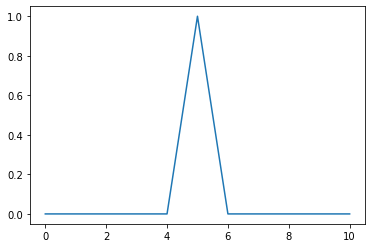

In [ ]:
checkpoin_weights = []

for l in model.layers:
  checkpoin_weights.append(l.get_weights())


model2 = Sequential()
model2.add(Reshape((input_size, num_sensors), input_shape=(input_size, )))
model2.add(Conv1D(1, 11, activation='linear', input_shape=(input_size, num_sensors), padding='same'))
model2.add(Conv1D(50, 10, activation='relu', input_shape=(input_size, num_sensors), trainable='False'))
model2.add(Conv1D(25, 10, activation='relu', trainable='False'))
model2.add(MaxPooling1D(4))
model2.add(Conv1D(100, 10, activation='relu', trainable='False'))
model2.add(Conv1D(50, 10, activation='relu', trainable='False'))
model2.add(MaxPooling1D(4))
model2.add(Dropout(0.5))
#next layers will be retrained
model2.add(Conv1D(100, 10, activation='relu', trainable='False'))
model2.add(GlobalAveragePooling1D())
model2.add(Dense(num_classes, activation='softmax', trainable='False'))

#for i in range(1, 11):
#  model2.layers[i+1].set_weights(checkpoin_weights[i])

w = model2.layers[1].get_weights()
print(w[0].shape)

w[0] = w[0] * 0
w[0][5,0,0] = 1
w[1] = w[1]*0
plt.plot(w[0].flatten())

w = model2.layers[1].set_weights(w)

for i in range(1, 11):
  model2.layers[i+1].set_weights(checkpoin_weights[i])

model2.compile(loss='categorical_crossentropy',
         optimizer='adam', metrics=['accuracy'])

model2.evaluate(train_signals, train_labels)

!tensorboard dev upload --logdir ./ \
  --name "Simple experiment" \
  --description "Training results from https://colab.sandbox.google.com/github/tensorflow/tensorboard/blob/master/docs/tbdev_getting_started.ipynb" \
  --one_shot
!tensorboard dev list
#keras.utils.plot_model(model2, 'dense_image_classifier.png', show_shapes=True)


In [ ]:
#keras.utils.plot_model(model2, 'dense_image_classifier.png', show_shapes=True)

Epoch 1/25
10/10 [==============================] - 1s 33ms/step - loss: 3.1650 - accuracy: 0.4694 - val_loss: 1.1799 - val_accuracy: 0.5960
Epoch 2/25
10/10 [==============================] - 0s 8ms/step - loss: 0.9496 - accuracy: 0.6667 - val_loss: 0.8023 - val_accuracy: 0.7172
Epoch 3/25
10/10 [==============================] - 0s 8ms/step - loss: 0.6810 - accuracy: 0.7585 - val_loss: 0.6892 - val_accuracy: 0.7677
Epoch 4/25
10/10 [==============================] - 0s 8ms/step - loss: 0.4251 - accuracy: 0.8571 - val_loss: 0.5602 - val_accuracy: 0.8283
Epoch 5/25
10/10 [==============================] - 0s 8ms/step - loss: 0.3374 - accuracy: 0.8810 - val_loss: 0.5294 - val_accuracy: 0.8687
Epoch 6/25
10/10 [==============================] - 0s 8ms/step - loss: 0.2547 - accuracy: 0.9048 - val_loss: 0.4772 - val_accuracy: 0.8485
Epoch 7/25
10/10 [==============================] - 0s 8ms/step - loss: 0.2006 - accuracy: 0.9354 - val_loss: 0.4659 - val_accuracy: 0.8586
Epoch 8/25
10/10 [=

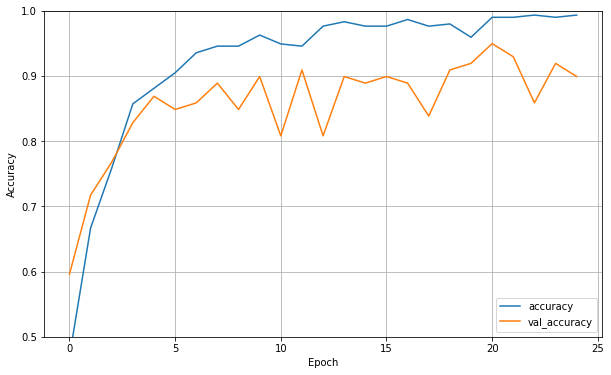

In [ ]:
history = model2.fit(train_signals, train_labels, epochs=25, 
                   validation_data=(test_signals, test_labels))


plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#функция вывода коэффициентов свёрточного слоя
def check_coef_conv_layer(model_name, num_layer, num_filter):
  
  #сохраняем в переменную коэффициенты наблюдаемого слоя
  l = model_name.layers[num_layer].get_weights()

  #коэффициенты 'а' наблюдаемого слоя первой сети 
  a = l[0]
  #коэффициенты 'b' наблюдаемого слоя первой сети 
  b = l[1]
  #вывод данных на экран
  for i in range(10):
    print("k{} = {:7.4f}".format(i, a[i][0][num_filter]))
  print("\nb = {:7.4f}".format(b[num_filter]))

#функция вывода коеффициентов полносвязного слоя
def check_coef_dense_layer(model_name, num_layer, num_filter):

  #сохраняем в переменную веса наблюдаемого слоя сети
  l = model_name.layers[num_layer].get_weights()

  #коэффициенты 'а' наблюдаемого слоя сети 
  a = l[0]
  #коэффициенты 'b' наблюдаемого слоя сети 
  b = l[1]
  #вывод данных на экран
  for i in range(10):
    print("k{} = {:7.4f}".format(i, a[i][num_filter]))
  print("\nb = {:7.4f}".format(b[num_filter]))

l = model.layers[10].get_weights()


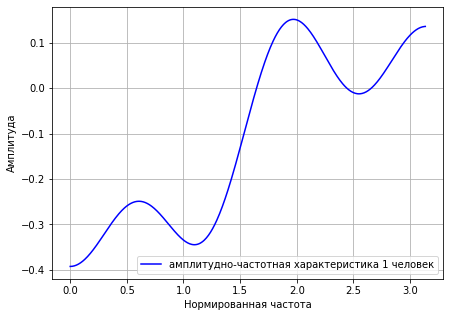

In [ ]:
b = model2.layers[1].get_weights()
w, h = signal.freqz(b[0].flatten())
plt.figure(figsize=(7, 5))
plt.plot(w, 20 * np.log10(abs(h)), 'b', label='амплитудно-частотная характеристика 1 человек')
plt.grid(True)
plt.xlabel('Нормированная частота')
plt.ylabel('Амплитуда, dB')
plt.legend(loc='lower right')
#print(b[0])

#plt.set_xlabel('Frequency [rad/sample]')
#plt.set_ylabel('Amplitude [dB]', color='b')

Text(0.5, 1.0, 'импульсная характеристика пациент 1')

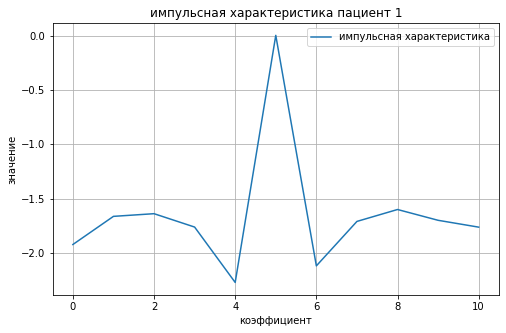

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.log10(b[0].flatten()+0.02), label='импульсная характеристика')
plt.grid(True)
plt.xlabel('коэффициент')
plt.ylabel('значение')
plt.legend(loc='upper right')
plt.title('импульсная характеристика пациент 1')